## Pasajeros de Avion con Facebook Prophet

In [1]:
import pandas as pd
from prophet import Prophet


In [2]:
df = pd.read_csv('./airline_passengers.csv')

In [3]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

16:38:30 - cmdstanpy - INFO - Chain [1] start processing
16:38:30 - cmdstanpy - INFO - Chain [1] done processing


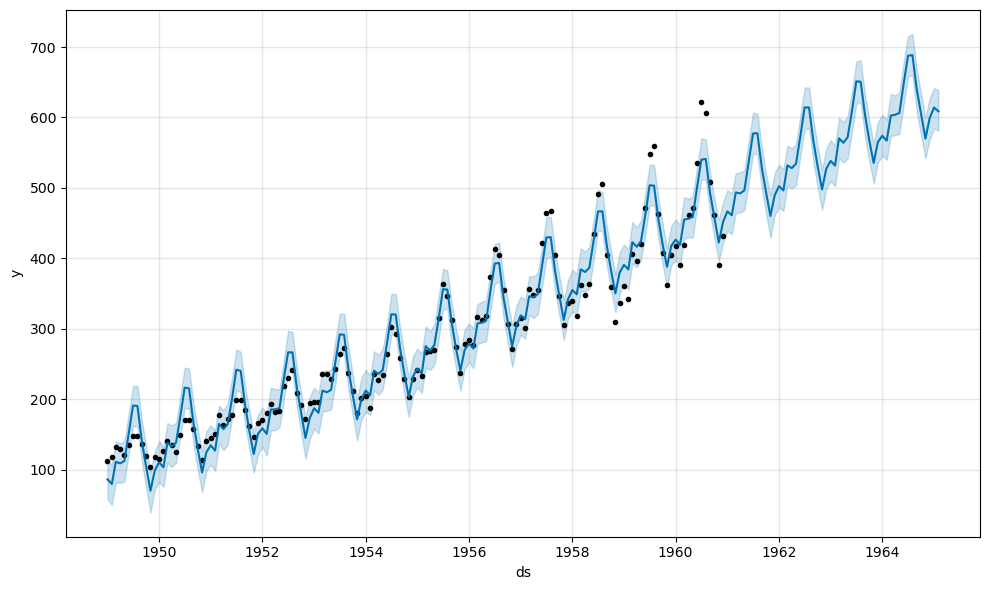

In [5]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

Esta serie temporal tiene un ciclo anual, pero la estacionalidad en el pronóstico es demasiado grande al comienzo de la serie temporal y demasiado pequeña al final. En esta serie de tiempo, la estacionalidad no es un factor aditivo constante como lo supone Prophet por defecto, sino que crece con la tendencia. Esta es la estacionalidad multiplicativa.

### Cambiamos la frecuencia a multiplicativa

16:39:30 - cmdstanpy - INFO - Chain [1] start processing
16:39:30 - cmdstanpy - INFO - Chain [1] done processing


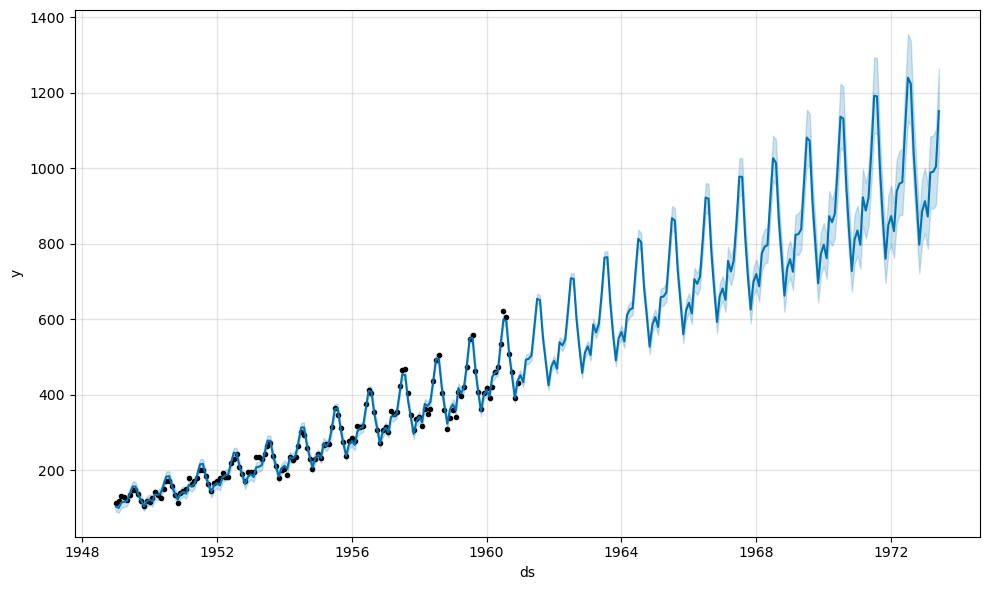

In [8]:
# Prophet tiene muchos parametros - es clave ajustarlos bien y conocerlos para no acabar con los valores por defecto

m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(150, freq='MS')

forecast = m.predict(future)
fig = m.plot(forecast)

16:44:45 - cmdstanpy - INFO - Chain [1] start processing
16:44:45 - cmdstanpy - INFO - Chain [1] done processing


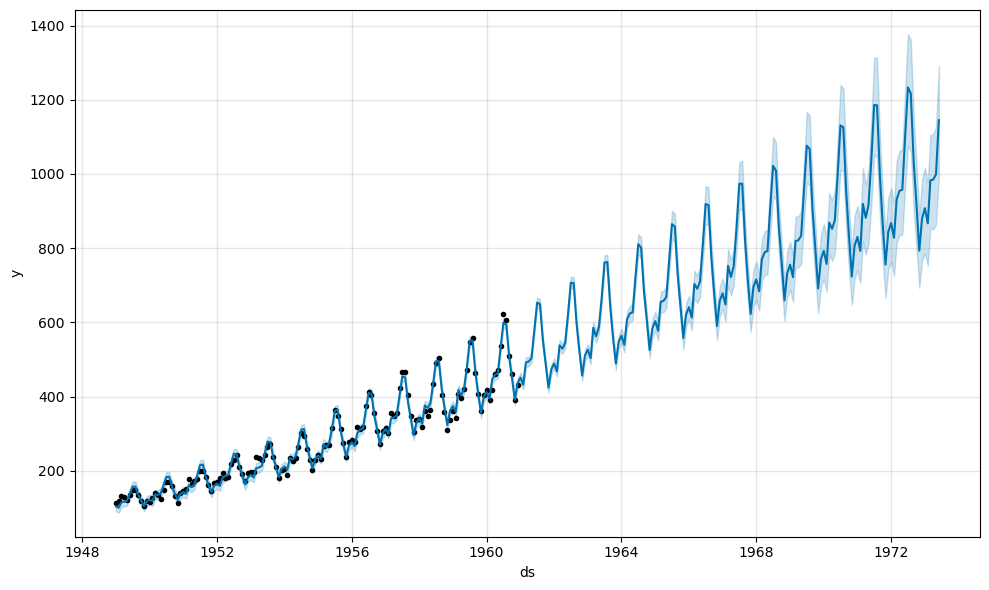

In [9]:

m= Prophet(
    seasonality_mode='multiplicative',
    n_changepoints=int(len(df) / 12),
    yearly_seasonality=True)

m.fit(df)
forecast = m.predict(future)
fig = m.plot(forecast)